In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#!pip install --upgrade tables

In [6]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car"

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car


In [0]:
df = pd.read_hdf('data/car.h5')

In [9]:
df.shape

(106494, 155)

In [10]:
df.columns.values

array(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       'feature_kurtyny-powietrzne', 'feature_klimatyzacja-dwustrefowa',
       'feature_światła-led', 'feature_czujnik-zmierzchu',
       'feature_elektrycznie-ustawiane-lusterka',
       'feature_asr-(kontrola-trakcji)',
       'feature_poduszka-powietrzna-kierowcy', 'feature_cd',
       'feature_elektryczne-szyby-przednie',
       'feature_poduszka-powietrzna-pasażera',
       'feature_system-start-stop', 'feature_światła-do-jazdy-dziennej',
       'feature_komputer-pokładowy', 'feature_elektryczne-szyby-tylne',
       'feature_klimatyzacja-manualna', 'feature_tapicerka-welurowa',
       'feature_czujnik-deszczu', 'feature_światła-przeciwmgielne',
       'feature_ogrzewanie-postojowe', 'feature_radio-niefabryczne',
       'feature_regulowane-zaw

## Wizualizacja danych

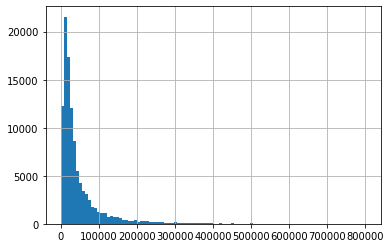

In [11]:
df.price_value.hist(bins=100);

In [12]:
df.price_value.max()

799900.0

In [14]:
df.price_value.describe()

count    106494.000000
mean      47534.137437
std       66308.716918
min         400.000000
25%       13890.000000
50%       25500.000000
75%       52900.000000
max      799900.000000
Name: price_value, dtype: float64

In [18]:
df.groupby(['param_marka-pojazdu'])['price_value'].mean()

param_marka-pojazdu
Acura         32349.250000
Aixam         26129.208955
Alfa Romeo    52053.311086
Aro           20800.000000
Asia          12500.000000
                  ...     
Yugo          47500.000000
Zaporożec      3900.000000
Zastava        2999.000000
Škoda         40068.437434
Żuk            4722.500000
Name: price_value, Length: 100, dtype: float64

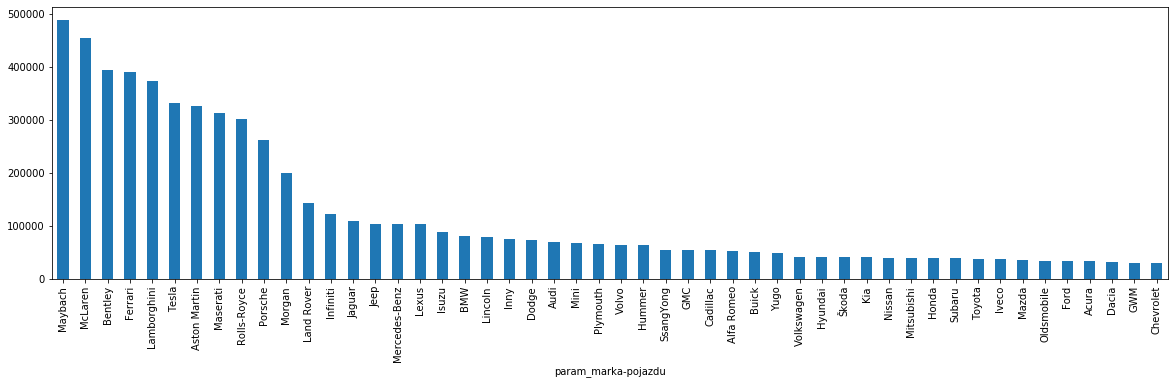

In [26]:
(
 df
 .groupby(['param_marka-pojazdu'])['price_value']
 .agg(np.mean)
 .sort_values(ascending=False)
 .head(50)
 
).plot(kind='bar', figsize=(20,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f717aa4fba8>,
      dtype=object)

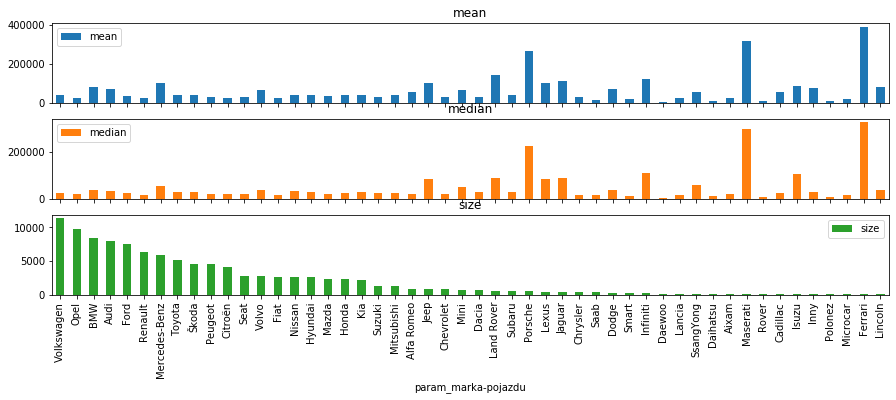

In [32]:
(
 df
 .groupby(['param_marka-pojazdu'])['price_value']
 .agg((np.mean, np.median, np.size))
 .sort_values(by='size', ascending=False)
 .head(50)
 
).plot(kind='bar', figsize=(15,5), subplots=True)

In [0]:
def plotter(feat_groupby, feat_agg='price_value', agg_funcs=[np.mean, np.median, np.size], feat_sort='mean', top=50, subplots=True):
  return (
      df
      .groupby(feat_groupby)[feat_agg]
      .agg(agg_funcs)
      .sort_values(by=feat_sort, ascending=False)
      .head(top)
  ).plot(kind='bar', figsize=(15,5), subplots=subplots)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7179fb1a20>,
      dtype=object)

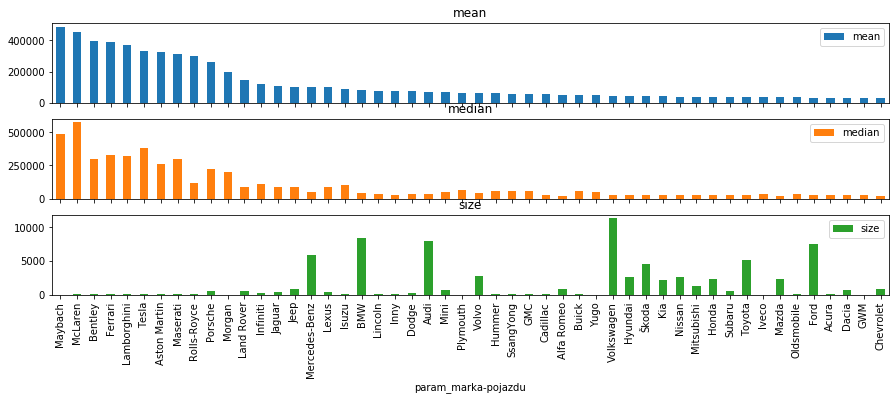

In [37]:
plotter('param_marka-pojazdu')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f71790b8cf8>,
      dtype=object)

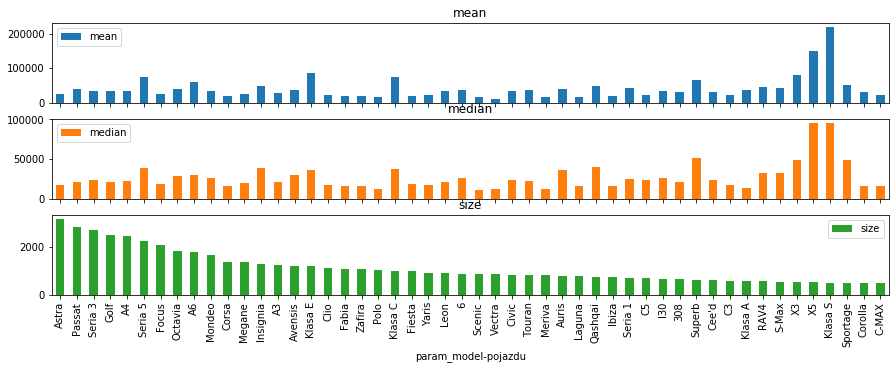

In [43]:
plotter('param_model-pojazdu', feat_sort='size')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7179307128>,
      dtype=object)

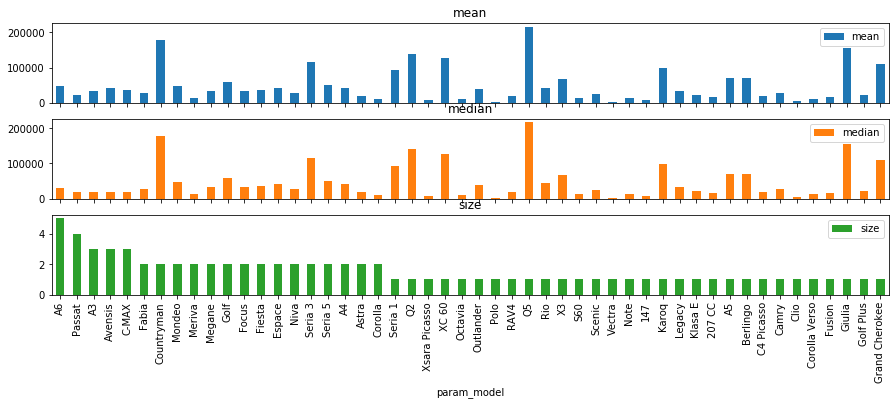

In [44]:
plotter('param_model', feat_sort='size')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f71790b08d0>,
      dtype=object)

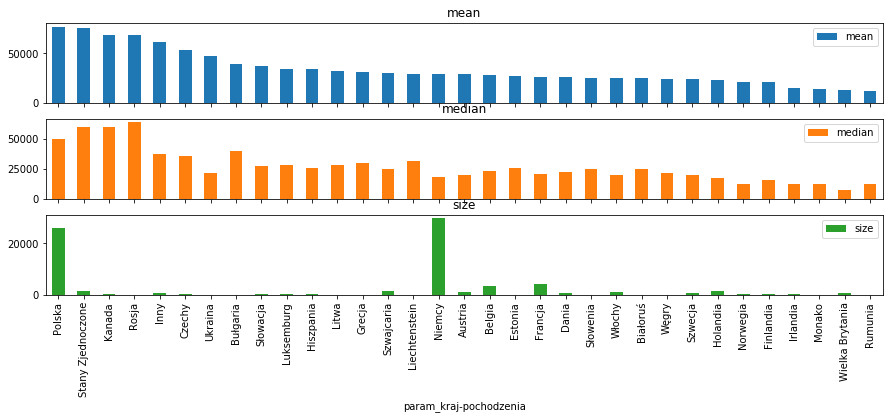

In [42]:
plotter('param_kraj-pochodzenia')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7179113c50>,
      dtype=object)

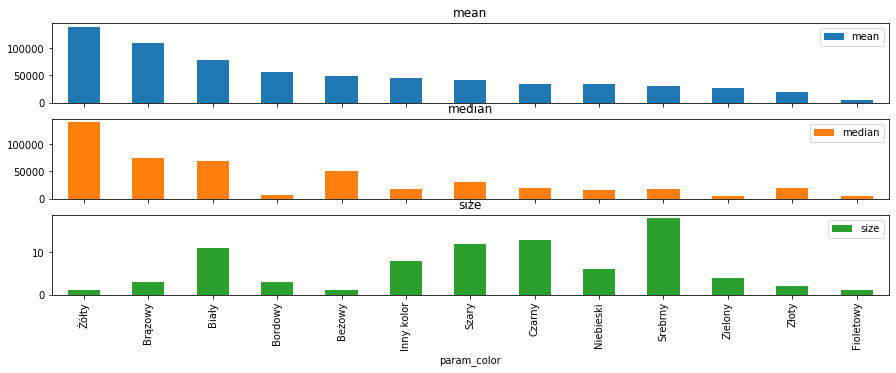

In [41]:
plotter('param_color')